In [1]:
# Kuwahara(쿠와하라) 필터 : 의료용 영상에 적합한 필터
# 가장자리를 흐리게 만들지 않으면서도 노이즈를 제거할 수 있는 필터
import cv2
import numpy as np
img = cv2.imread("d:/data/images/penguin.png")

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
#노이즈 생성
img_noise = np.zeros_like(gray)
for i in range(height):
    for j in range(width):
        make_noise = np.random.normal()
        set_noise = 10 * make_noise
        img_noise[i][j] = gray[i][j] + set_noise

In [3]:
# 원본보다 +4의 크기로 생성(좌우 +2 제로패딩)
temp = np.zeros((height + 4, width + 4), dtype=float)
temp[2: 2 + height, 2: 2 + width] = img_noise.copy().astype(float)
out = np.zeros_like(gray)
for i in range(height):
    for j in range(width):
        point1 = temp[i:i + 3, j:j + 3]
        point2 = temp[i + 2:i + 5, j:j + 3]
        point3 = temp[i:i + 2, j + 2:j + 5]
        point4 = temp[i + 2:i + 5, j + 2:j + 5]
        if min(np.var(point1), np.var(point2), np.var(point3), np.var(point4)) == np.var(point1):
            out[i, j] = np.mean(temp[i:i + 3, j:j + 3])
        elif min(np.var(point1), np.var(point2), np.var(point3), np.var(point4)) == np.var(point2):
            out[i, j] = np.mean(temp[i + 2:i + 5, j:j + 3])
        elif min(np.var(point1), np.var(point2), np.var(point3), np.var(point4)) == np.var(point3):
            out[i, j] = np.mean(temp[i:i + 2, j + 2:j + 5])
        elif min(np.var(point1), np.var(point2), np.var(point3), np.var(point4)) == np.var(point4):
            out[i, j] = np.mean(temp[i + 2:i + 5, j + 2:j + 5])

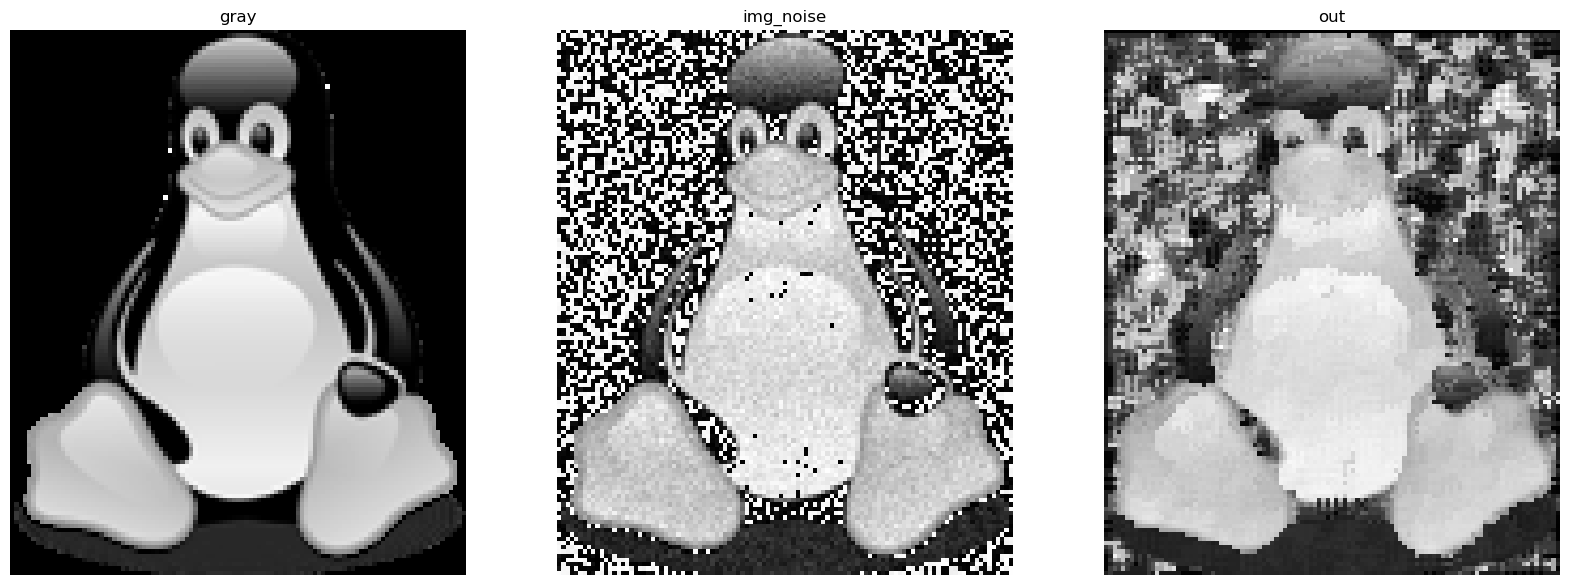

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('gray')
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(img_noise.astype(float), cmap='gray')
plt.title('img_noise')
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(out.astype(np.uint8), cmap='gray')
plt.title('out')
plt.axis("off")
plt.show()

In [8]:
from pykuwahara import kuwahara
out2 = kuwahara(img_noise)

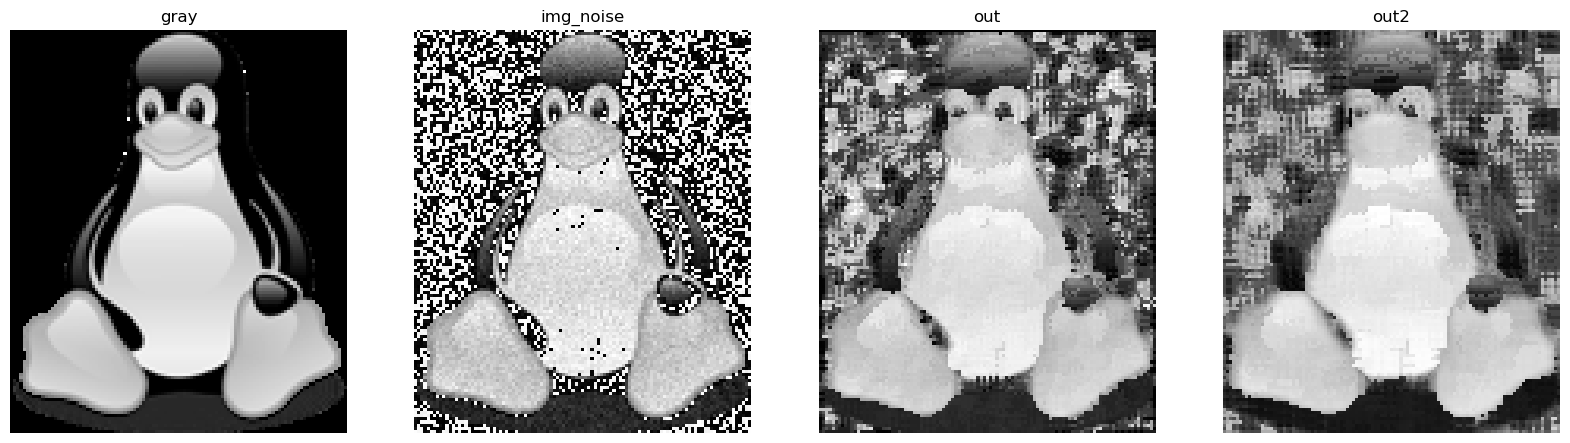

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title('gray')
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(img_noise.astype(float), cmap='gray')
plt.title('img_noise')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(out.astype(np.uint8), cmap='gray')
plt.title('out')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(out2.astype(np.uint8), cmap='gray')
plt.title('out2')
plt.axis("off")

plt.show()